> **OBTENCIÓN DE PARÁMETROS DE TEXTURA Y CARACTERÍSTICAS**


In [74]:
pip install scikit-image

In [82]:
#IMPORTAR LIBRERÍA
import pandas as pd                                     # LIBRERÍA PARA DATAFRAMES
import numpy as np                                      # LIBRERÍA PARA MATRICES
import os                                               # LIBRERÍA PARA OPERACIONES CON EL SISTEMA OPERATIVO
import matplotlib.pyplot as plt                         # LIBRERÍA PARA GRÁFICAS 2D

from google.colab import drive                          # LIBRERÍA PARA IMPORTAR DESDE GOOGLE DRIVE
from google.colab.patches import cv2_imshow

In [48]:
%matplotlib inline

In [49]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
def co_ocurrencia_0(imagen):
  h,w = imagen.shape

  matriz = np.zeros((256,256))
  #INTENSIDADES
  for i in range(0,256):
    for j in range(0,256):
      #BUSCAR Y CONTAR DODNE LA INTENSIDAD SEA IGUAL A i, y SU PIXEL DE LA DERECHA IGUAL A j
      cont = 0
      for n in range(0,h):
        for m in range(0,w):
          if m < w-1:
            if imagen[n,m] == i and imagen[n,m+1] == j:
              cont = cont + 1
      matriz[i,j] = cont    
  return matriz

> Importación Imágenes y Características de Entrenamiento (Con Tumores)
---

In [67]:
mainpath = "drive/My Drive/DATASET"
rutaImagen = "TUMOR_CEREBRO"

porcBlancos = np.zeros((200,1))
promedios = np.zeros((200,1))
desviaciones = np.zeros((200,1))
maximos = np.zeros((200,1))
minimos = np.zeros((200,1))
entropias = np.zeros((200,1))

for i in range(0,200): 
  if i < 10:
    rutaArchivo = "00"+str(i)+".png"
  if i >= 10 and i < 100:
    rutaArchivo = "0"+str(i)+".png"
  if i >= 100 and i < 200:
    rutaArchivo = str(i)+".png"

  rutaTotal = os.path.join(mainpath,rutaImagen,rutaArchivo)

  #OBTENER LA CAPA ROJA DE LA IMAGEN
  imagen = cv2.imread(rutaTotal)[...,::-1]
  img = imagen[:,:,0].copy()
  img.astype(np.uint8)

  altura, ancho = img.shape

  #UMBRALIZACIÓN DE LA IMAGEN
  _,imgUmb = cv2.threshold(img,200,255,cv2.THRESH_BINARY)

  #EROSIÓN + DILATACIÓN DE LA IMAGEN
  kernel = np.ones((5,5),np.uint8)
  imgErosion = cv2.erode(imgUmb,kernel,iterations=3)
  imgDilatacion = cv2.dilate(imgErosion,kernel,iterations=3)

  #OBTENER PARÁMETROS
  # Porcentaje de Blancos respecto al total de la imagen
  porcBlanco = (np.sum(imgDilatacion))/(altura*ancho)
  porcBlancos[i,0] = porcBlanco

  # Promedio de la intensidad de pixel
  promedio = np.mean(img)
  promedios[i,0] = promedio

  # Desviación Estándar de la intensidad de pixel
  desviacion = np.std(img)
  desviaciones[i,0] = desviacion

  # Máxima intensidad de pixel
  maximo = np.amax(img)
  maximos[i,0] = maximo

  # Mínimo intensidad de pixel
  minimo = np.amin(img)
  minimos[i,0] = minimo

  # Entropia de la imagen
  imgLog = [pixel for pixel in img.ravel() if pixel > 0]
  logEntro = (imgLog*np.log2(imgLog))
  logEntro = logEntro/(100*np.amax(logEntro))
  entropia = np.sum(logEntro)
  entropias[i,0] = entropia



entropias

array([[26256.  ],
       [19488.  ],
       [11848.  ],
       [13088.  ],
       [15640.  ],
       [14688.  ],
       [ 4560.  ],
       [ 7208.  ],
       [ 7968.  ],
       [ 2998.  ],
       [ 2910.  ],
       [17152.  ],
       [14400.  ],
       [12704.  ],
       [11856.  ],
       [ 7836.  ],
       [ 9880.  ],
       [11928.  ],
       [ 9784.  ],
       [10256.  ],
       [ 5268.  ],
       [10848.  ],
       [ 8456.  ],
       [ 2700.  ],
       [ 7100.  ],
       [12312.  ],
       [16016.  ],
       [11280.  ],
       [14992.  ],
       [ 9128.  ],
       [14288.  ],
       [ 6716.  ],
       [ 5336.  ],
       [16592.  ],
       [13904.  ],
       [14816.  ],
       [12168.  ],
       [12792.  ],
       [10128.  ],
       [15360.  ],
       [13576.  ],
       [ 4840.  ],
       [ 5004.  ],
       [10600.  ],
       [ 9544.  ],
       [ 7120.  ],
       [ 5932.  ],
       [ 6908.  ],
       [ 9192.  ],
       [ 7504.  ],
       [ 6536.  ],
       [ 5728.  ],
       [ 856

In [104]:
c = np.array([[2,4,6,10],[0,0,4,25]])
cd = np.where(c == 0)
cde = np.array(list(zip(cd[0],cd[1])))
print(cde)
print(c)

cde[]

[[1 0]
 [1 1]]
[[ 2  4  6 10]
 [ 0  0  4 25]]


In [123]:
c = np.array([[2,4,6,10],[0,0,4,25]])
for m in c:
  print(m)

[ 2  4  6 10]
[ 0  0  4 25]


In [127]:
mainpath = "drive/My Drive/DATASET"
rutaImagen = "TUMOR_CEREBRO"
rutaArchivo = "00"+str(0)+".png"

rutaTotal = os.path.join(mainpath,rutaImagen,rutaArchivo)

#OBTENER LA CAPA ROJA DE LA IMAGEN
imagen = cv2.imread(rutaTotal)[...,::-1]
img = imagen[:,:,0].copy()
img.astype(np.uint8)

altura, ancho = img.shape

ma = co_ocurrencia_0(img)
ma

KeyboardInterrupt: ignored

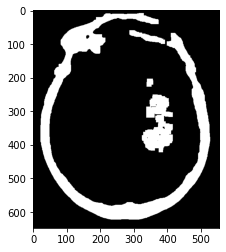

In [ ]:
kernelM=np.ones((5,5),np.uint8)
imgErosion = cv2.erode(imagenUmb,kernelM,iterations=3)
imgDilatacion = cv2.dilate(imgErosion,kernelM,iterations=3)

plt.imshow(imgDilatacion, cmap = "gray")

In [ ]:
np.sum(imgDilatacion)

16599225

In [33]:
img_PT = imagen[:,:,0]
img_PT = [pixel for pixel in img_PT.ravel() if pixel > 0]
img_PT = np.array([img_PT])

img_PT.shape
img_PT = img_PT[0:100]

In [41]:
entro = img_PT*np.log2(img_PT)
check = entro[entro == 0]
np.sum(check)

0.0

In [46]:
a = np.array([2,2,3])
entro = a*np.log2(a)
entro

array([2.       , 2.       , 4.7548875])

In [35]:
np.sum(img_PT*np.log2(img_PT))

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


inf